In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
uber=pd.read_csv('datasets_1026_1855_My Uber Drives - 2016.csv')
uber

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [7]:
#Take a look into the loaded dataframe
#The field PURPOSE* has nan values. Replace it by category "Other"
uber.info()
uber['PURPOSE*'].unique()
uber['PURPOSE*'].replace(np.nan, 'Other', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [10]:
uber.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DIFF
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0


In [11]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DIFF
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [12]:
# Remove uncessary data
uber = uber[:-1]

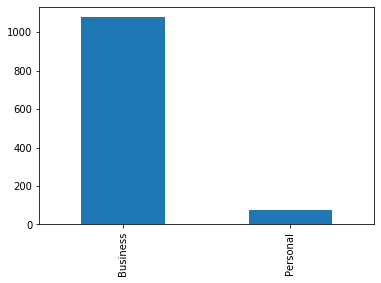

In [17]:
# plot number of trip at each category
x = uber['CATEGORY*'].value_counts().plot(kind='bar')

In [20]:
#extract month from start date
count = 0
month=[]
while count < len(uber):
    month.append(uber['START_DATE*'][count].month)
    count = count+1
uber['Month'] = month

In [21]:
# calculate duration of each trip in minutes
minutes=[]
uber['Duration_Minutes'] = uber['END_DATE*'] - uber['START_DATE*']
uber['Duration_Minutes']
for x in uber['Duration_Minutes']:
    minutes.append(x.seconds / 60)

uber['Duration_Minutes'] = minutes


Text(0.5, 1.0, 'Number of trips per Month')

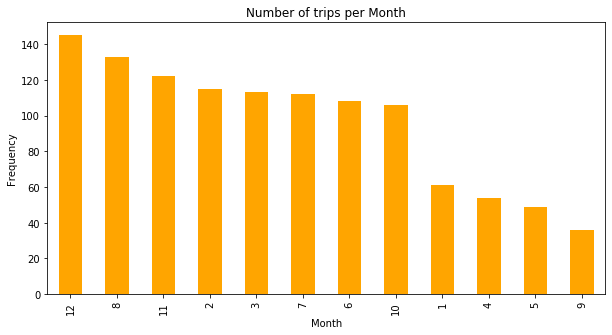

In [22]:
# plot number of trips at each month
x = uber['Month'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='orange')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month')

Text(0.5, 1.0, 'Number of trips per hour')

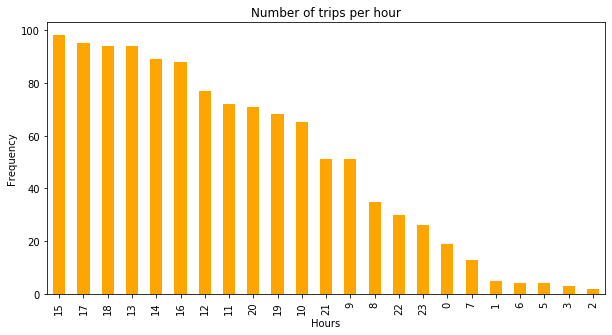

In [23]:
# I need to see how many trip made at each clock and as you see the clock which has the higest number of trips is 3:00PM
hours = uber['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='orange',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hour')

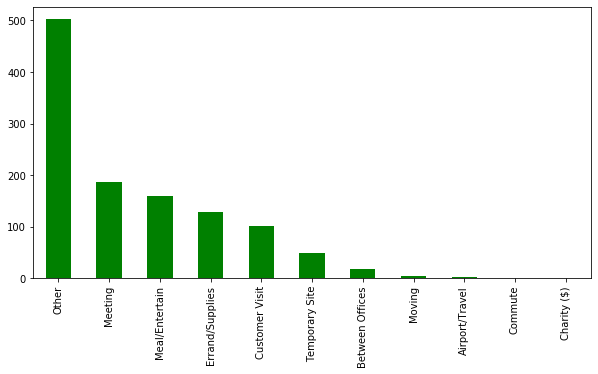

In [24]:
# see how many trips made by each purpose
purpose_time = uber['PURPOSE*'].value_counts()
purpose_time.plot(kind='bar',figsize=(10,5),color='green') 

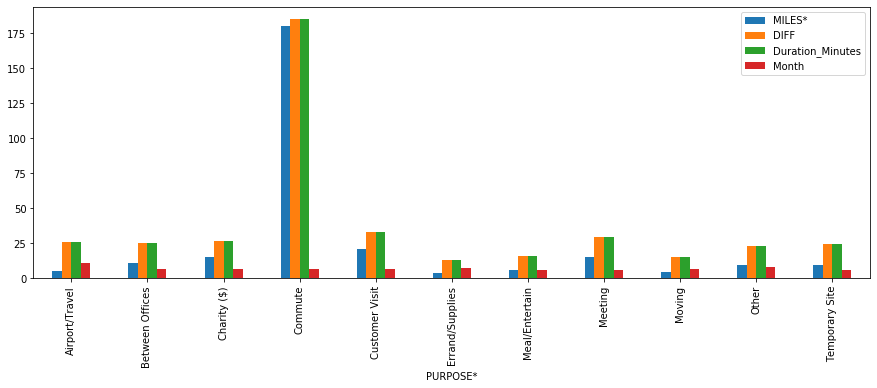

In [25]:
# aveverage of each trip according to purpose
purpose = uber.groupby('PURPOSE*').mean()
purpose.plot(kind = 'bar',figsize=(15,5))

In [26]:
# calculate trip speed for each driver
uber['Duration_hours'] = uber['Duration_Minutes'] / 60
uber['Speed_KM'] = uber['MILES*'] / uber['Duration_hours']
uber['Speed_KM']

0       51.000000
1       25.000000
2       22.153846
3       20.142857
4       57.044776
          ...    
1149    12.000000
1150     6.000000
1151    13.000000
1152    27.771429
1153    21.333333
Name: Speed_KM, Length: 1154, dtype: float64

In [27]:
uber['PURPOSE*'].value_counts()

Other              502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      49
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64

In [29]:
import seaborn as sns

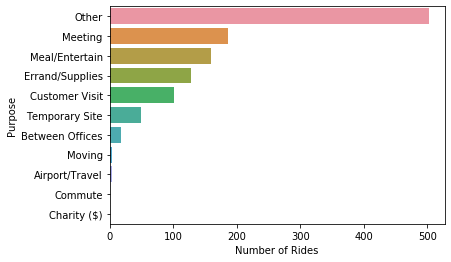

In [30]:
#creating a dataframe containing type of purpose and the number of rides associated with each purpose
ride_count = uber['PURPOSE*'].value_counts().tolist()
ride_purpose= uber['PURPOSE*'].value_counts().index.tolist()
ride_info = list(zip(ride_purpose,ride_count))
ride_info = pd.DataFrame(ride_info,columns=['PURPOSE','COUNT'])

ax = sns.barplot(x='COUNT',y='PURPOSE',data=ride_info,order=ride_info['PURPOSE'].tolist())
ax.set(xlabel='Number of Rides', ylabel='Purpose')
plt.show()

In [31]:
uber['CATEGORY*'].value_counts()

Business    1077
Personal      77
Name: CATEGORY*, dtype: int64

In [32]:
ride_summary = uber.groupby('PURPOSE*').mean()
ride_summary

,MILES*,DIFF,Duration_Minutes,Month,Duration_hours,Speed_KM
PURPOSE*,,,,,,
Airport/Travel,5.500000,26.000000,26.000000,10.666667,0.433333,13.531575
Between Offices,10.944444,25.500000,25.500000,6.722222,0.425000,25.622915
Charity ($),15.100000,27.000000,27.000000,7.000000,0.450000,33.555556
Commute,180.200000,185.000000,185.000000,7.000000,3.083333,58.443243
Customer Visit,20.688119,33.415842,33.415842,6.603960,0.556931,30.294273
Errand/Supplies,3.968750,12.976562,12.976562,7.015625,0.216276,19.463559
Meal/Entertain,5.698125,16.125000,16.125000,5.906250,0.268750,21.759906
Meeting,15.247594,29.737968,29.737968,6.240642,0.495633,28.545516
Moving,4.550000,15.000000,15.000000,7.000000,0.250000,18.388393


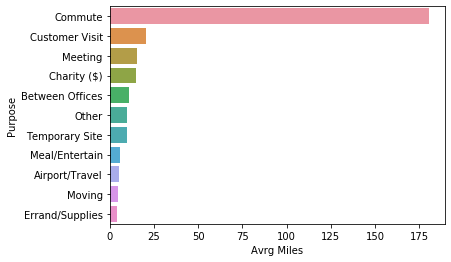

In [33]:
ride_summary['PURPOSE*']=ride_summary.index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=ride_summary,order=ride_summary.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show()